## LangChain Components
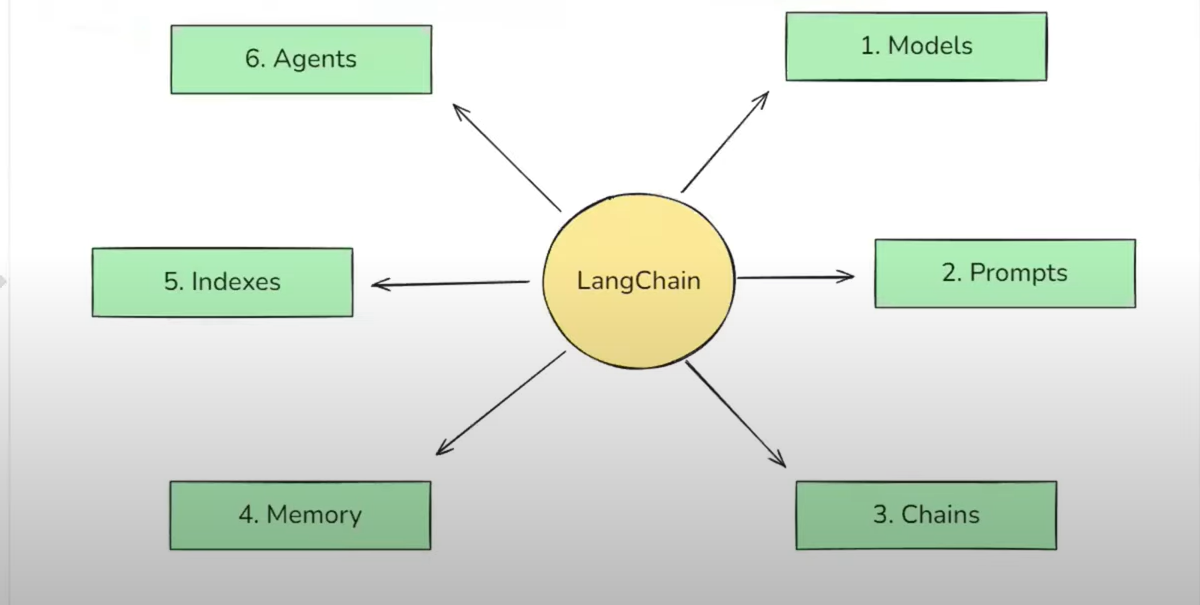


## 1. Models [LangChain](https://python.langchain.com/docs/integrations/chat/)
In LangChain, `Models` are the core interfaces through which you interact with AI Models.
#### **What are Models in LangChain?**
Models in LangChain are standardized wrappers around language models (LLMs) and chat models (like OpenAI’s GPT, Cohere, Anthropic, etc.). They provide a consistent interface for interacting with various underlying LLM providers.

#### **Types of Models**
- **LLMs (Language Models):** Used for text completion and generation.
- **Chat Models:** Designed for conversational interactions, with messages and roles (e.g., user, assistant).

#### **Purpose**
- Abstract away API differences between providers.
- Allow easy swapping of underlying LLMs.
- Enable unified access to text generation, chat, and embeddings.

#### **Example Usage**
```python
from langchain.llms import OpenAI

# Initialize an OpenAI language model
llm = OpenAI(model="gpt-3.5-turbo")

# Generate a response
response = llm("Explain LangChain models in one sentence.")
print(response)
```

#### **Key Benefits**
- Consistency: Same interface regardless of LLM provider.
- Flexibility: Easily change the underlying model without changing your code logic.
- Integration: Works seamlessly with other LangChain components (prompts, chains, agents, etc.).

## 2. Prompts (LangChain)

#### **What are Prompts in LangChain?**
Prompts are templates or instructions sent to language models to guide their output. LangChain provides utilities to create, format, and manage prompts, making it easier to build dynamic and complex instructions for LLMs.

#### **Types of Prompts**
- **Prompt Templates:** Parameterized templates with placeholders (input variables) that can be filled in at runtime.
- **Few-shot Prompting:** Templates that include example input-output pairs to guide the model with context.

#### **Purpose**
- Standardize and reuse prompt structures.
- Dynamically inject user or system data into prompts.
- Enable advanced prompting techniques (few-shot, chain-of-thought, etc.).

#### **Example Usage**
**1. Dynamic & Reusable Prompts**
```python
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template('Summarize {topic} in {emotion} tone')
print(prompt.format(topic='Cricket', length='fun'))
```
**2. Role-Based Prompts**
```python
# Define the ChatPromptTemplate using from_template
chat_prompt = ChatPromptTemplate.from_template([
    {"system": "Hi you are an experienced {profession}"},
    {"user": "Tell me about {topic}"},
])

# Format the message with variables
formatted_messages = chat_prompt.format_messages(profession='Doctor', topic='Viral Fever')
```
**3. Few Shot Prompting**
```python
# Step 1: Examples List
examples = [
    {
        "input": "I was charged twice for my subscription this month.",
        "output": "Billing Issue"
    },
    {
        "input": "The app crashes every time I try to log in.",
        "output": "Technical Problem"
    },
    {
        "input": "Can you explain how to upgrade my plan?",
        "output": "General Inquiry"
    },
    {
        "input": "I need a refund for a payment I didn't authorize.",
        "output": "Billing Issue"
    }
]

# Step 2: Create an Example Template
# Define the example template with placeholders for input and output
example_template = """
Ticket: {input}
Category: {output}
"""

# Step 3: Build the Few-Shot Prompt Template
# Create the few-shot prompt template
few_shot_prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=prompt_template,
    prefix='Classify the following customer support tickets into categories: Billing Issue, Technical Problem, General Inquiry.',
    suffix='Ticket: {user_input}\nCategory:',
    input_variables=["user_input"]
)
```
Classify the following customer support tickets into one of the categories: 'Billing Issue', 'Technical Problem', or 'General Inquiry'.

Ticket: I was charged twice for my subscription this month.<br>
Category: Billing Issue

Ticket: The app crashes every time I try to log in.<br>
Category: Technical Problem

Ticket: Can you explain how to upgrade my plan? <br>
Category: General Inquiry

Ticket: I need a refund for a payment I didn’t authorize.<br>
Category: Billing Issue

Ticket: I am unable to connect to the internet using your service.<br>
Category:


#### **Key Benefits**
- **Reusability:** Easily use the same prompt template with different data.
- **Flexibility:** Build complex, multi-step prompts programmatically.
- **Best Practices:** Encourages clean, maintainable prompt engineering.

## 3. Chains (LangChain)

#### **What are Chains in LangChain?**
Chains are sequences of operations that connect prompts, models, and other logic into a workflow. They let you combine multiple steps, such as formatting input, calling an LLM, processing output, and even invoking other tools or APIs.

#### **Types of Chains**
- **LLMChain:** The most basic chain—takes input, formats a prompt, sends it to an LLM, and returns the result.
- **SequentialChain:** Runs multiple chains in sequence, passing outputs from one as inputs to the next.
- **SimpleSequentialChain:** Like SequentialChain but only passes the main output between steps.
- **Custom Chains:** You can create your own by composing steps as needed.

#### **Purpose**
- Encapsulate multi-step logic.
- Reuse and share workflows.
- Compose complex behaviors from simple building blocks.

#### **Example Usage**
```python
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Define model and prompt
llm = OpenAI(model="gpt-3.5-turbo")
prompt = PromptTemplate(
    template="Translate '{text}' to French.",
    input_variables=["text"]
)

# Create a chain that puts it together
chain = LLMChain(llm=llm, prompt=prompt)
output = chain.run(text="hello")  # Output will be the French translation of "hello"
```

#### **Key Benefits**
- **Modularity:** Break complex tasks into manageable steps.
- **Composability:** Combine chains to build advanced applications.
- **Flexibility:** Integrate with memory, tools, and external APIs.

## 4. Indexes (LangChain)
Indexes connect your application to external knowledge—such as PDFs, websites, or databases.
#### **What are Indexes in LangChain?**
Indexes (often called Vector Stores) are components that store and manage document embeddings (numeric representations of text). They enable fast similarity search, retrieval, and lookup of relevant documents or chunks based on a user’s query.

#### **Purpose**
- Power retrieval-augmented generation (RAG) by letting the LLM access relevant external knowledge.
- Enable semantic search over large collections of text.
- Efficiently store and retrieve documents for context injection.

#### **How It Works**
1. **Documents are chunked** (split into pieces).
2. **Embeddings are generated** for each chunk using an embedding model.
3. **Chunks and their embeddings are stored in a vector store** (index).
4. **When a query is made**, it’s embedded and compared to the stored vectors to find the most relevant chunks.

#### **Popular Vector Store Backends**
- **FAISS** (local, open-source)
- **Pinecone** (cloud, scalable)
- **Chroma** (local, fast)
- **Weaviate**, **Qdrant**, **Milvus**, etc.

#### **Example Usage**
```python
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

# Prepare your documents and embeddings
documents = ["LangChain is powerful.", "Indexes enable retrieval.", "Chains sequence operations."]
embeddings = OpenAIEmbeddings()

# Build the vector store (index)
vectorstore = FAISS.from_texts(documents, embeddings)

# Perform a similarity search
results = vectorstore.similarity_search("How do I retrieve document context?", k=2)
```

#### **Key Benefits**
- **Scalability:** Efficiently handles large collections.
- **Semantic Search:** Finds relevant data based on meaning, not just keywords.
- **Integration:** Seamlessly plugged into memory, chains, and agents for RAG workflows.

## 5. Memory (LangChain)
LLM API calls are stateless

**Who is Narendra Modi?** → LLM API → Narendra Modi is an Indian politician serving as the 14th and current Prime Minister of India since May 2014

**How old is he?** → LLM API → As an AI, I don't have access to personal data about individuals unless it has been shared with me in the course of our conversation.

- **ConversationBufferMemory:** Stores a transcript of recent messages. Great for short chats but can grow large quickly.
- **ConversationBufferWindowMemory:** Only keeps the last N interactions to avoid excessive token usage.
- **Summarizer-Based Memory:** Periodically summarizes older chat segments to keep a condensed memory footprint.
- **Custom Memory:** For advanced use cases, you can store specialized state (e.g., the user's preferences or key facts about them) in a custom memory class.
#### **What is Memory in LangChain?**
Memory refers to mechanisms for storing and retrieving information across steps in a conversation or workflow. It allows your application to “remember” previous interactions, user inputs, or generated outputs, thereby enabling contextual and coherent multi-turn conversations.

#### **Purpose**
- Maintain context across multiple user interactions.
- Enable more dynamic, human-like conversational experiences.
- Store and recall facts, history, or other data for use in chains and agents.

#### **Types of Memory**
- **ConversationBufferMemory:** Stores the full conversation as a buffer (like a chat log).
- **ConversationSummaryMemory:** Stores a summary of the conversation, using an LLM to condense previous exchanges.
- **VectorStoreRetrieverMemory:** Uses a vector store (index) to retrieve relevant past context based on similarity.
- **EntityMemory:** Tracks and recalls specific entities mentioned during the conversation.

#### **Example Usage**
```python
from langchain.memory import ConversationBufferMemory

# Initialize memory
memory = ConversationBufferMemory()

# Save a turn of conversation
memory.save_context({"input": "Who is the CEO of OpenAI?"}, {"output": "Sam Altman"})

# Retrieve memory variables (conversation history)
history = memory.load_memory_variables({})
print(history["history"])
```

#### **Key Benefits**
- **Contextual Awareness:** Models can reference previous conversation turns, improving relevance and coherence.
- **Customizability:** Choose the memory type and retention method that fits your application.
- **Seamless Integration:** Easily plug memory into agents, chains, and workflows in LangChain.

## 6. Agents (LangChain)

#### **What are Agents in LangChain?**
Agents are intelligent, autonomous systems that use a language model to decide what actions to take given a user’s goal and a set of available tools. Instead of following a fixed sequence, agents reason step-by-step, choosing actions dynamically—like searching the web, running code, or querying a database—to solve complex, multi-step problems.

#### **Purpose**
- Automate complex tasks that require decision-making, tool use, or external data fetching.
- Enable conversational assistants that can perform actions, not just generate text.
- Adapt workflows dynamically based on user input or intermediate results.

#### **How Agents Work**
1. **Receive a user query or goal.**
2. **Use the LLM to reason about next steps** (e.g., "Should I use a calculator? Search the web? Ask the user for clarification?").
3. **Choose and execute tools** (APIs, search engines, code interpreters, etc.).
4. **Iterate**—the agent may loop, using results from one tool to choose the next action.
5. **Respond to the user** once the task is complete.

#### **Agent Types**
- **Zero-shot Agents:** Rely solely on the prompt and LLM for decision-making (no examples given).
- **ReAct Agents:** Use "Reasoning and Acting"—LLM reasons, chooses a tool, observes the result, and repeats.
- **Conversational Agents:** Designed for maintaining dialogue and context.

### **Tools**
Agents use “tools” such as:
- Web search
- Calculators
- Code execution
- Database queries
- Custom APIs

#### **Example Usage**
```python
from langchain.llms import OpenAI
from langchain.agents import initialize_agent, load_tools

llm = OpenAI(model="gpt-3.5-turbo")
tools = load_tools(["serpapi", "calculator"])
agent = initialize_agent(tools, llm, agent="zero-shot-react-description")

result = agent.run("What is the square root of the population of Canada?")
print(result)
```

#### **Key Benefits**
- **Autonomy:** Handles complex, open-ended tasks.
- **Composability:** Combine multiple tools and reasoning steps.
- **Adaptability:** Reacts and plans based on real-time data and results.